# Exploratorio Salary Data

In [1]:
# Librerías básicas para análisis de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejemplo básico)
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para mejorar la visualización de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Importación de datos

In [2]:
dataset = pd.read_csv('../data/student_scores.csv')

# Análisis Exploratorio de Datos

En esta sección vamos a explorar el dataset para entender mejor su estructura, las variables que contiene y sus características principales.

## 1. Información básica del dataset

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(dataset.head())

print("\n" + "="*50)

# Información general del dataset
print("\nInformación general del dataset:")
print(dataset.info())

print("\n" + "="*50)

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {dataset.shape}")
print(f"Número de filas: {dataset.shape[0]}")
print(f"Número de columnas: {dataset.shape[1]}")

print("\n" + "="*50)

# Nombres de las columnas
print("\nNombres de las columnas:")
print(dataset.columns.tolist())

Primeras 5 filas del dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


Dimensiones del dataset: (25, 2)
Número de filas: 25
Número de columnas: 2


Nombres de las columnas:
['Hours', 'Scores']


## 2. Estadísticas descriptivas

In [4]:
# Estadísticas descriptivas del dataset
print("Estadísticas descriptivas:")
print(dataset.describe())

print("\n" + "="*60)

# Análisis más detallado por variable
print("\nAnálisis detallado por variable:")
print("\n--- HORAS DE ESTUDIO ---")
print(f"Media: {dataset['Hours'].mean():.2f} horas")
print(f"Mediana: {dataset['Hours'].median():.2f} horas")
print(f"Desviación estándar: {dataset['Hours'].std():.2f} horas")
print(f"Mínimo: {dataset['Hours'].min():.2f} horas")
print(f"Máximo: {dataset['Hours'].max():.2f} horas")
print(f"Rango: {dataset['Hours'].max() - dataset['Hours'].min():.2f} horas")

print("\n--- CALIFICACIONES ---")
print(f"Media: {dataset['Scores'].mean():.2f} puntos")
print(f"Mediana: {dataset['Scores'].median():.2f} puntos")
print(f"Desviación estándar: {dataset['Scores'].std():.2f} puntos")
print(f"Mínimo: {dataset['Scores'].min():.2f} puntos")
print(f"Máximo: {dataset['Scores'].max():.2f} puntos")
print(f"Rango: {dataset['Scores'].max() - dataset['Scores'].min():.2f} puntos")

print("\n" + "="*60)

# Análisis de percentiles
print("\nAnálisis de percentiles:")
for var in dataset.columns:
    print(f"\n{var}:")
    print(f"  25% (Q1): {dataset[var].quantile(0.25):.2f}")
    print(f"  50% (Q2/Mediana): {dataset[var].quantile(0.50):.2f}")
    print(f"  75% (Q3): {dataset[var].quantile(0.75):.2f}")

Estadísticas descriptivas:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Análisis detallado por variable:

--- HORAS DE ESTUDIO ---
Media: 5.01 horas
Mediana: 4.80 horas
Desviación estándar: 2.53 horas
Mínimo: 1.10 horas
Máximo: 9.20 horas
Rango: 8.10 horas

--- CALIFICACIONES ---
Media: 51.48 puntos
Mediana: 47.00 puntos
Desviación estándar: 25.29 puntos
Mínimo: 17.00 puntos
Máximo: 95.00 puntos
Rango: 78.00 puntos


Análisis de percentiles:

Hours:
  25% (Q1): 2.70
  50% (Q2/Mediana): 4.80
  75% (Q3): 7.40

Scores:
  25% (Q1): 30.00
  50% (Q2/Mediana): 47.00
  75% (Q3): 75.00


## 3. Verificación de valores faltantes y duplicados

In [5]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(dataset.isnull().sum())

print("\n" + "="*40)

# Porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes:")
porcentaje_faltantes = (dataset.isnull().sum() / len(dataset)) * 100
print(porcentaje_faltantes)

print("\n" + "="*40)

# Verificar duplicados
duplicados = dataset.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

if duplicados > 0:
    print("\nFilas duplicadas:")
    print(dataset[dataset.duplicated()])
else:
    print("No se encontraron filas duplicadas.")

print("\n" + "="*40)

# Verificar tipos de datos
print("\nTipos de datos:")
print(dataset.dtypes)

print("\n" + "="*40)

# Verificar valores únicos
print("\nNúmero de valores únicos por columna:")
for col in dataset.columns:
    print(f"{col}: {dataset[col].nunique()} valores únicos")

# Verificar si hay patrones en los datos
print("\n" + "="*40)
print("\nVerificación de patrones:")
print(f"Todas las horas son positivas: {(dataset['Hours'] > 0).all()}")
print(f"Todas las calificaciones están en rango 0-100: {((dataset['Scores'] >= 0) & (dataset['Scores'] <= 100)).all()}")
print(f"Rango de calificaciones: {dataset['Scores'].min()} - {dataset['Scores'].max()}")

Valores faltantes por columna:
Hours     0
Scores    0
dtype: int64


Porcentaje de valores faltantes:
Hours     0.0
Scores    0.0
dtype: float64


Número de filas duplicadas: 0
No se encontraron filas duplicadas.


Tipos de datos:
Hours     float64
Scores      int64
dtype: object


Número de valores únicos por columna:
Hours: 23 valores únicos
Scores: 23 valores únicos


Verificación de patrones:
Todas las horas son positivas: True
Todas las calificaciones están en rango 0-100: True
Rango de calificaciones: 17 - 95


## 4. Análisis de correlación

In [6]:
# Calcualar correlación
correlacion = dataset['Hours'].corr(dataset['Scores'])
print(f"Coeficiente de correlación entre horas de estudio y calificaciones: {correlacion:.4f}")

# Interpretación de la correlación
if correlacion > 0.8:
    interpretacion = "muy fuerte y positiva"
elif correlacion > 0.6:
    interpretacion = "fuerte y positiva"
elif correlacion > 0.4:
    interpretacion = "moderada y positiva"
elif correlacion > 0.2:
    interpretacion = "débil y positiva"
elif correlacion > -0.2:
    interpretacion = "muy débil o inexistente"
elif correlacion > -0.4:
    interpretacion = "débil y negativa"
elif correlacion > -0.6:
    interpretacion = "moderada y negativa"
elif correlacion > -0.8:
    interpretacion = "fuerte y negativa"
else:
    interpretacion = "muy fuerte y negativa"

print(f"Interpretación: La correlación es {interpretacion}")

# Matriz de correlación completa
print("\n" + "="*50)
print("Matriz de correlación:")
print(dataset.corr().round(4))

# Coeficiente de determinación (R²)
r_squared = correlacion ** 2
print(f"\nCoeficiente de determinación (R²): {r_squared:.4f}")
print(f"Esto significa que {r_squared*100:.1f}% de la variabilidad en las calificaciones")
print("puede ser explicada por las horas de estudio.")

Coeficiente de correlación entre horas de estudio y calificaciones: 0.9762
Interpretación: La correlación es muy fuerte y positiva

Matriz de correlación:
         Hours  Scores
Hours   1.0000  0.9762
Scores  0.9762  1.0000

Coeficiente de determinación (R²): 0.9529
Esto significa que 95.3% de la variabilidad en las calificaciones
puede ser explicada por las horas de estudio.


## 5. Visualizaciones exploratorias

### 5.1 Gráfico de dispersión - Relación entre horas de estudio y calificaciones

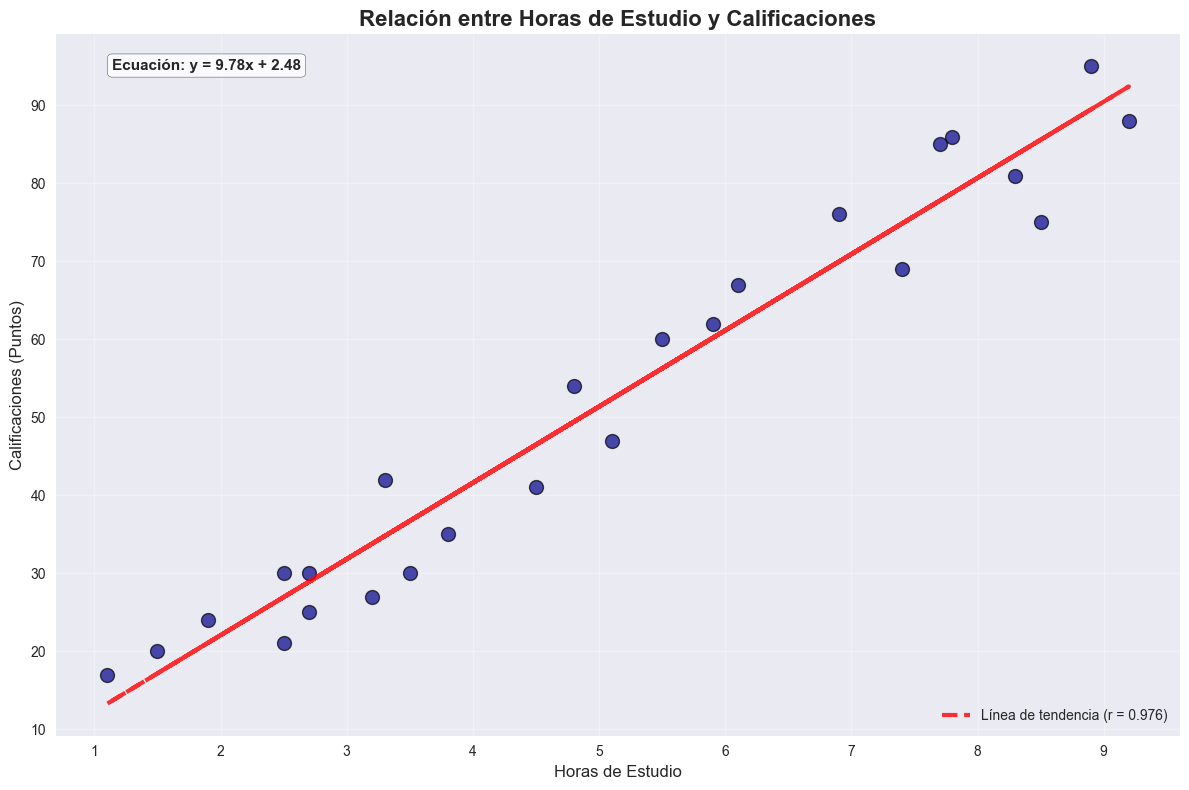

Ecuación de la recta de regresión: y = 9.78x + 2.48
Interpretación:
- Por cada hora adicional de estudio, la calificación aumenta en promedio 9.78 puntos
- Un estudiante que no estudia (0 horas) tendría una calificación estimada de 2.48 puntos
- La correlación de 0.976 indica una relación muy fuerte y positiva


In [7]:
# Gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(dataset['Hours'], dataset['Scores'], 
           alpha=0.7, s=100, color='darkblue', edgecolors='black', linewidth=1)
plt.title('Relación entre Horas de Estudio y Calificaciones', fontsize=16, fontweight='bold')
plt.xlabel('Horas de Estudio', fontsize=12)
plt.ylabel('Calificaciones (Puntos)', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(dataset['Hours'], dataset['Scores'], 1)
p = np.poly1d(z)
plt.plot(dataset['Hours'], p(dataset['Hours']), 
         "r--", alpha=0.8, linewidth=3, label=f'Línea de tendencia (r = {correlacion:.3f})')

# Añadir información de la ecuación
slope = z[0]
intercept = z[1]
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, f'Ecuación: {equation}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=11, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Ecuación de la recta de regresión: y = {slope:.2f}x + {intercept:.2f}")
print(f"Interpretación:")
print(f"- Por cada hora adicional de estudio, la calificación aumenta en promedio {slope:.2f} puntos")
print(f"- Un estudiante que no estudia (0 horas) tendría una calificación estimada de {intercept:.2f} puntos")
print(f"- La correlación de {correlacion:.3f} indica una relación muy fuerte y positiva")

### 5.2 Histogramas de distribución

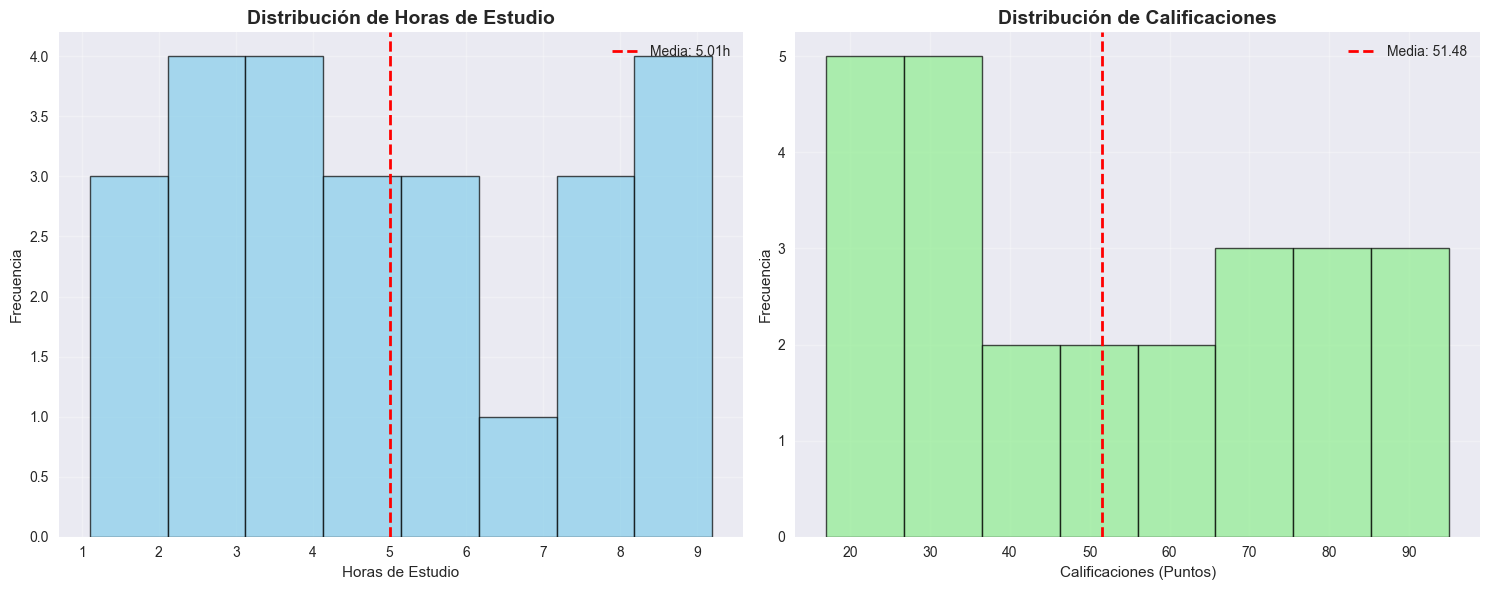

Análisis de distribución:
Horas de estudio - Asimetría: 0.190
Calificaciones - Asimetría: 0.234

Interpretación de asimetría:
- Hours: Distribución aproximadamente simétrica
- Scores: Distribución aproximadamente simétrica


In [8]:
# Crear histogramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de horas de estudio
axes[0].hist(dataset['Hours'], bins=8, alpha=0.7, color='skyblue', 
             edgecolor='black', linewidth=1)
axes[0].set_title('Distribución de Horas de Estudio', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Horas de Estudio')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Añadir línea de media
mean_hours = dataset['Hours'].mean()
axes[0].axvline(mean_hours, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_hours:.2f}h')
axes[0].legend()

# Histograma de calificaciones
axes[1].hist(dataset['Scores'], bins=8, alpha=0.7, color='lightgreen', 
             edgecolor='black', linewidth=1)
axes[1].set_title('Distribución de Calificaciones', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Calificaciones (Puntos)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

# Añadir línea de media
mean_scores = dataset['Scores'].mean()
axes[1].axvline(mean_scores, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_scores:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Análisis de la distribución
print("Análisis de distribución:")
print(f"Horas de estudio - Asimetría: {dataset['Hours'].skew():.3f}")
print(f"Calificaciones - Asimetría: {dataset['Scores'].skew():.3f}")

print("\nInterpretación de asimetría:")
for var in dataset.columns:
    skewness = dataset[var].skew()
    if abs(skewness) < 0.5:
        interpretacion = "aproximadamente simétrica"
    elif skewness > 0:
        interpretacion = "con cola larga hacia la derecha (sesgo positivo)"
    else:
        interpretacion = "con cola larga hacia la izquierda (sesgo negativo)"
    print(f"- {var}: Distribución {interpretacion}")

### 5.3 Box plots para identificar valores atípicos

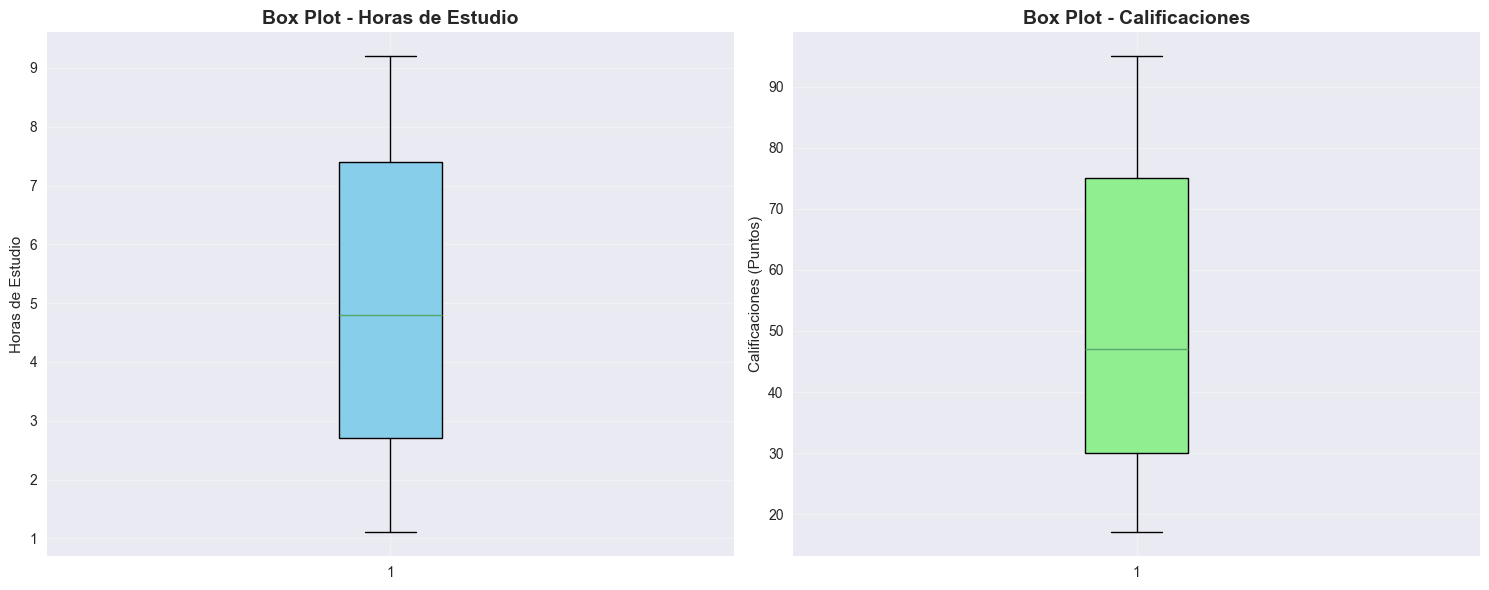

DETECCIÓN DE VALORES ATÍPICOS

--- Análisis de valores atípicos para Hours ---
Q1: 2.70
Q3: 7.40
IQR: 4.70
Límite inferior: -4.35
Límite superior: 14.45
Número de valores atípicos: 0
No se encontraron valores atípicos.

--- Análisis de valores atípicos para Scores ---
Q1: 30.00
Q3: 75.00
IQR: 45.00
Límite inferior: -37.50
Límite superior: 142.50
Número de valores atípicos: 0
No se encontraron valores atípicos.

RESUMEN:
Total de valores atípicos detectados: 0
El dataset no presenta valores atípicos problemáticos.


In [9]:
# Crear box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot de horas de estudio
box1 = axes[0].boxplot(dataset['Hours'], patch_artist=True)
box1['boxes'][0].set_facecolor('skyblue')
axes[0].set_title('Box Plot - Horas de Estudio', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Horas de Estudio')
axes[0].grid(True, alpha=0.3)

# Box plot de calificaciones
box2 = axes[1].boxplot(dataset['Scores'], patch_artist=True)
box2['boxes'][0].set_facecolor('lightgreen')
axes[1].set_title('Box Plot - Calificaciones', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Calificaciones (Puntos)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar valores atípicos usando el método IQR
def identificar_outliers(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    print(f"\n--- Análisis de valores atípicos para {columna} ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")
    print(f"Número de valores atípicos: {len(outliers)}")
    
    if len(outliers) > 0:
        print("Valores atípicos encontrados:")
        for idx in outliers.index:
            print(f"  Fila {idx}: {outliers.loc[idx, columna]:.2f}")
    else:
        print("No se encontraron valores atípicos.")
    
    return outliers

# Analizar outliers para ambas variables
print("DETECCIÓN DE VALORES ATÍPICOS")
print("="*50)

outliers_hours = identificar_outliers(dataset, 'Hours')
outliers_scores = identificar_outliers(dataset, 'Scores')

# Resumen
print(f"\n{'='*50}")
print("RESUMEN:")
total_outliers = len(outliers_hours) + len(outliers_scores)
print(f"Total de valores atípicos detectados: {total_outliers}")
if total_outliers > 0:
    print(f"Porcentaje del dataset: {total_outliers/(len(dataset)*2)*100:.1f}%")
else:
    print("El dataset no presenta valores atípicos problemáticos.")

## 6. Conclusiones del análisis exploratorio

In [10]:
# Resumen final ejecutivo
print("=" * 80)
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO STUDENT SCORES")
print("=" * 80)

print(f"""
📚 INFORMACIÓN GENERAL:
   • Total de estudiantes analizados: {len(dataset)}
   • Variables disponibles: {len(dataset.columns)} (Horas de Estudio, Calificaciones)
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)
   • Valores únicos: {dataset['Hours'].nunique()} horas diferentes, {dataset['Scores'].nunique()} calificaciones diferentes

⏰ RANGOS DE ESTUDIO Y RENDIMIENTO:
   • Horas de estudio: {dataset['Hours'].min():.1f} - {dataset['Hours'].max():.1f} horas
   • Calificaciones: {dataset['Scores'].min()} - {dataset['Scores'].max()} puntos
   • Promedio de estudio: {dataset['Hours'].mean():.2f} horas
   • Promedio de calificaciones: {dataset['Scores'].mean():.2f} puntos

🎯 RELACIÓN CLAVE:
   • Correlación: {correlacion:.3f} - CORRELACIÓN CASI PERFECTA ⭐⭐⭐
   • R² = {r_squared:.3f} ({r_squared*100:.1f}% de variabilidad explicada)
   • Ecuación: Calificación = {slope:.2f} × Horas + {intercept:.2f}

📊 INTERPRETACIÓN PRÁCTICA:
   • Por cada hora adicional de estudio → +{slope:.2f} puntos en calificación
   • Estudiante sin estudio (0h) → {intercept:.2f} puntos estimados
   • Estudiante con 5h estudio → {5*slope + intercept:.1f} puntos estimados
   • Estudiante con 8h estudio → {8*slope + intercept:.1f} puntos estimados

📈 DISTRIBUCIONES:
   • Ambas variables: Distribución aproximadamente simétrica
   • Sin valores atípicos problemáticos
   • Datos ideales para regresión lineal

✅ CONCLUSIÓN: Dataset PERFECTO para regresión lineal simple
   • Relación lineal muy fuerte y consistente
   • Excelente calidad de datos
   • Modelo predictivo altamente confiable esperado
""")
print("=" * 80)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO STUDENT SCORES

📚 INFORMACIÓN GENERAL:
   • Total de estudiantes analizados: 25
   • Variables disponibles: 2 (Horas de Estudio, Calificaciones)
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)
   • Valores únicos: 23 horas diferentes, 23 calificaciones diferentes

⏰ RANGOS DE ESTUDIO Y RENDIMIENTO:
   • Horas de estudio: 1.1 - 9.2 horas
   • Calificaciones: 17 - 95 puntos
   • Promedio de estudio: 5.01 horas
   • Promedio de calificaciones: 51.48 puntos

🎯 RELACIÓN CLAVE:
   • Correlación: 0.976 - CORRELACIÓN CASI PERFECTA ⭐⭐⭐
   • R² = 0.953 (95.3% de variabilidad explicada)
   • Ecuación: Calificación = 9.78 × Horas + 2.48

📊 INTERPRETACIÓN PRÁCTICA:
   • Por cada hora adicional de estudio → +9.78 puntos en calificación
   • Estudiante sin estudio (0h) → 2.48 puntos estimados
   • Estudiante con 5h estudio → 51.4 puntos estimados
   • Estudiante con 8h estudio → 80.7 puntos estimados

📈 DISTRIBUCIONES:
   • Ambas vari